In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import numpy as np

%matplotlib inline



In [12]:
# Load the data
students_df = pd.read_excel('Students.xlsx')
clashes_df = pd.read_excel('Clashes.xlsx')

# Display the first few rows of each dataframe
display(students_df.head(), clashes_df.head())


,Student ID,Age,Gender,Programme Type,Programme,CGPA
0,Std_001,21 - 23,Male,Major Minor,Computer Science with Statistics,2.00 - 2.99
1,Std_002,18 - 20,Female,Major Minor,Statistics with Computer Science,2.00 - 2.99
2,Std_003,24 - 27,Male,Single Major,Information Technology,2.00 - 2.99
3,Std_004,18 - 20,Female,Single Major,Information Technology,2.00 - 2.99
4,Std_005,21 - 23,Male,Single Major,Information Technology,2.00 - 2.99


,Student ID,Programme,Clash Period
0,Std_319,Mathematics with Computer Science,Main Class
1,Std_173,Statistics with Computer Science,Main Class
2,Std_128,Statistics and Computer Science,Tutorial Class (Current)
3,Std_002,Statistics with Computer Science,Main Class
4,Std_124,Statistics with Computer Science,Tutorial Class (Current)


In [13]:
# Step 1: Determine Stratification Ratios
programme_counts = students_df['Programme'].value_counts(normalize=True)
display(programme_counts)


Programme
Information Technology               0.411215
Statistics with Computer Science     0.221184
Computer Science                     0.211838
Physics with Computer Science        0.040498
Statistics and Computer Science      0.040498
Mathematics with Computer Science    0.028037
Mathematics and Computer Science     0.018692
Computer Science with Statistics     0.012461
Physics and Computer Science         0.009346
Computer Science with Mathematics    0.003115
computer science with statistics     0.003115
Name: proportion, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

# Step 2: Stratify by Programme and Assign Groups
def stratified_sample(df, group_col, test_size=0.5, random_state=42):
    # Check if any class has less than 2 members
    class_counts = df[group_col].value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    
    # Filter the dataset to include only valid classes
    df_filtered = df[df[group_col].isin(valid_classes)]
    
    # Perform stratified sampling on the filtered dataset
    strat_train_set, strat_test_set = train_test_split(df_filtered, test_size=test_size, stratify=df_filtered[group_col], random_state=random_state)
    
    return strat_train_set, strat_test_set


In [56]:
# Load the data for "clashes" from the appropriate source
clashes = pd.read_excel('Clashes.xlsx')

# Define control_group and experimental_group before using them
control_group = pd.DataFrame()  
experimental_group = pd.DataFrame() 

# Rest of the code
main_clash_ids = clashes['Student ID'].values


In [40]:
# Step 7: Address Tutorial Class Clashes by switching
def switch_students(clash_students, source_group, target_group):
    for student in clash_students.itertuples():
        clash_student = source_group[source_group['Student ID'] == student.Student_ID]
        matched_student = target_group[(target_group['Gender'] == clash_student['Gender'].values[0]) & 
                                       (target_group['Programme Type'] == clash_student['Programme Type'].values[0]) & 
                                       (target_group['Programme'] == clash_student['Programme'].values[0]) & 
                                       (target_group['CGPA'] == clash_student['CGPA'].values[0])]

        if not matched_student.empty:
            source_group = source_group[source_group['Student ID'] != student.Student_ID]
            target_group = target_group[target_group['Student ID'] != matched_student.iloc[0]['Student ID']]
            source_group = pd.concat([source_group, matched_student])
            target_group = pd.concat([target_group, clash_student])
    return source_group, target_group


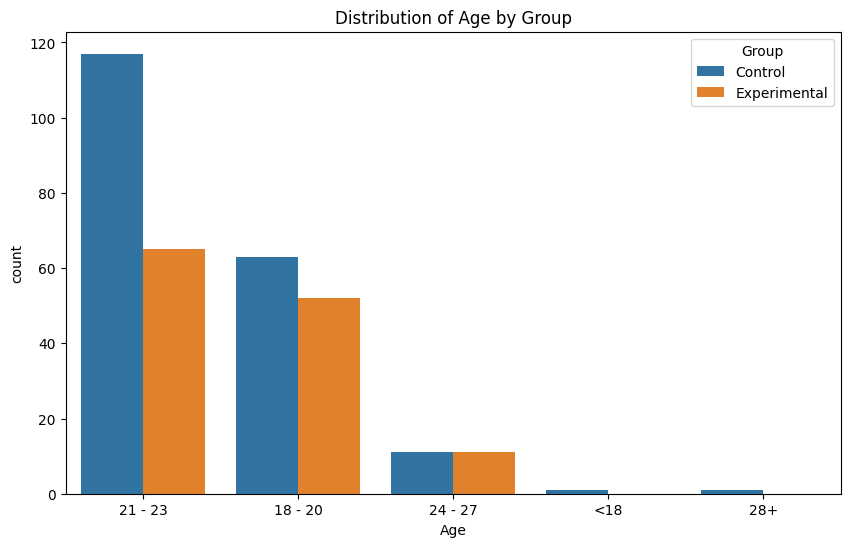

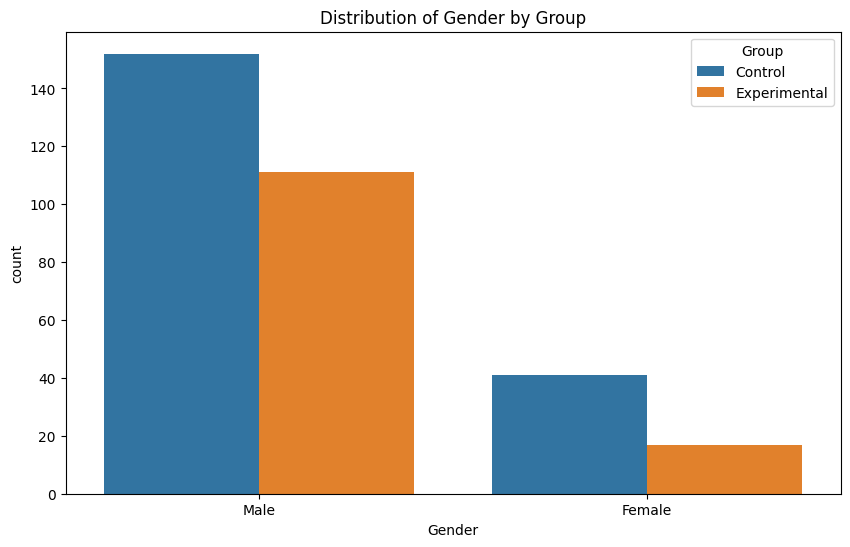

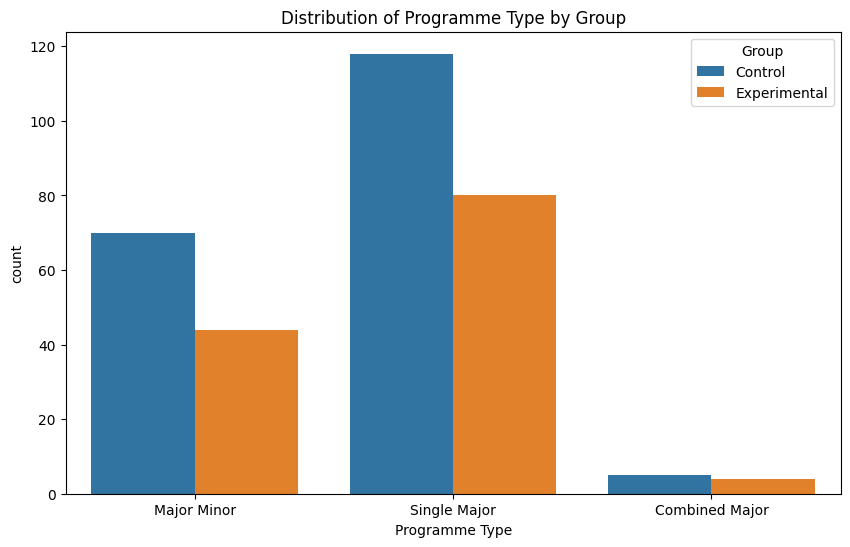

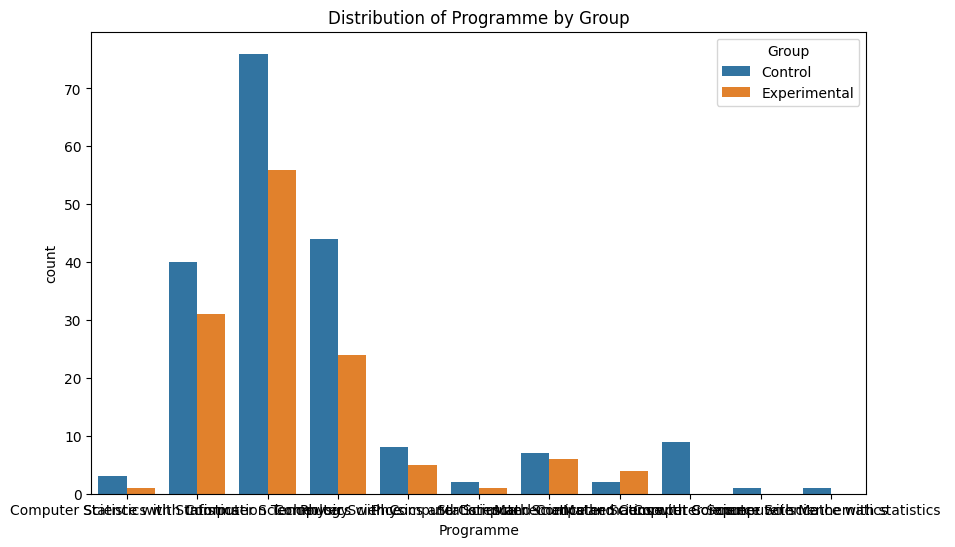

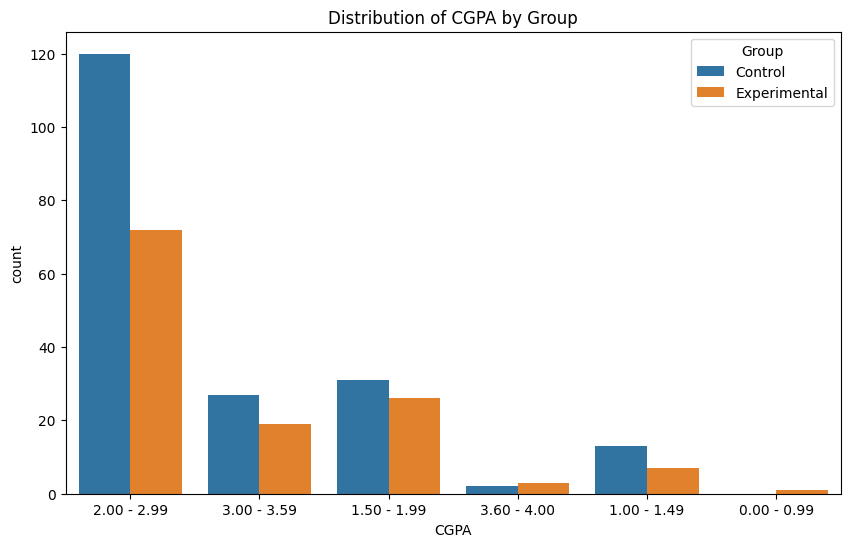

In [36]:
def plot_categorical_distribution(df, column, group_col='Group'):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue=group_col)
    plt.title(f'Distribution of {column} by Group')
    plt.show()

categorical_columns = ['Age', 'Gender', 'Programme Type', 'Programme', 'CGPA']
for col in categorical_columns:
    if col in Students_with_Groups.columns:
        plot_categorical_distribution(Students_with_Groups, col)
    else:
        print(f"Column {col} not found in the dataframe.")


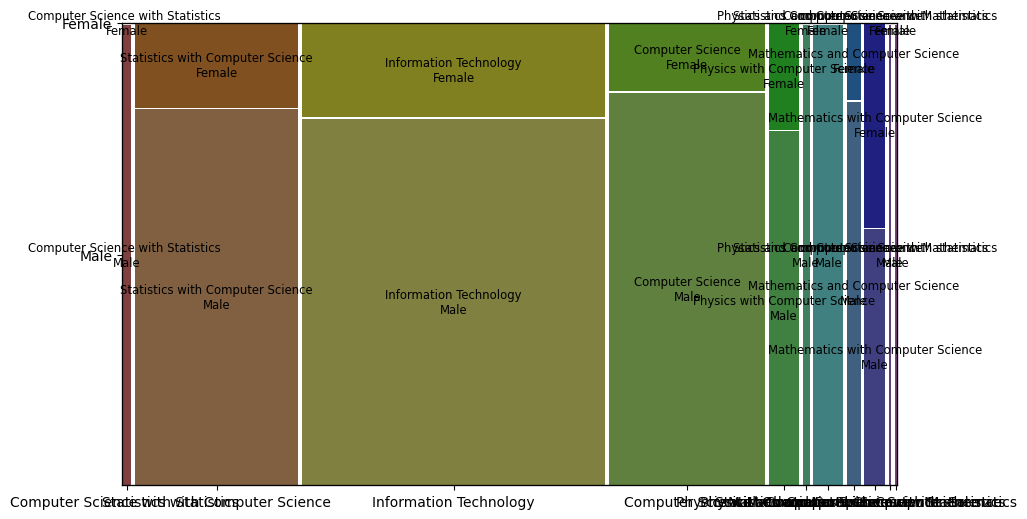

In [29]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt


# Define the plot_mosaic function with adjustable figure size
def plot_mosaic(df, columns, figsize=(30, 30)):  # Adjust figsize as needed
    fig, ax = plt.subplots(figsize=figsize)  # Create a figure and axes
    mosaic(df, columns, ax=ax)  # Create the mosaic plot on the specified axes
    plt.show()

# Call the function with desired columns and larger figure size
plot_mosaic(Students_with_Groups, ['Programme', 'Gender'], figsize=(10, 6))



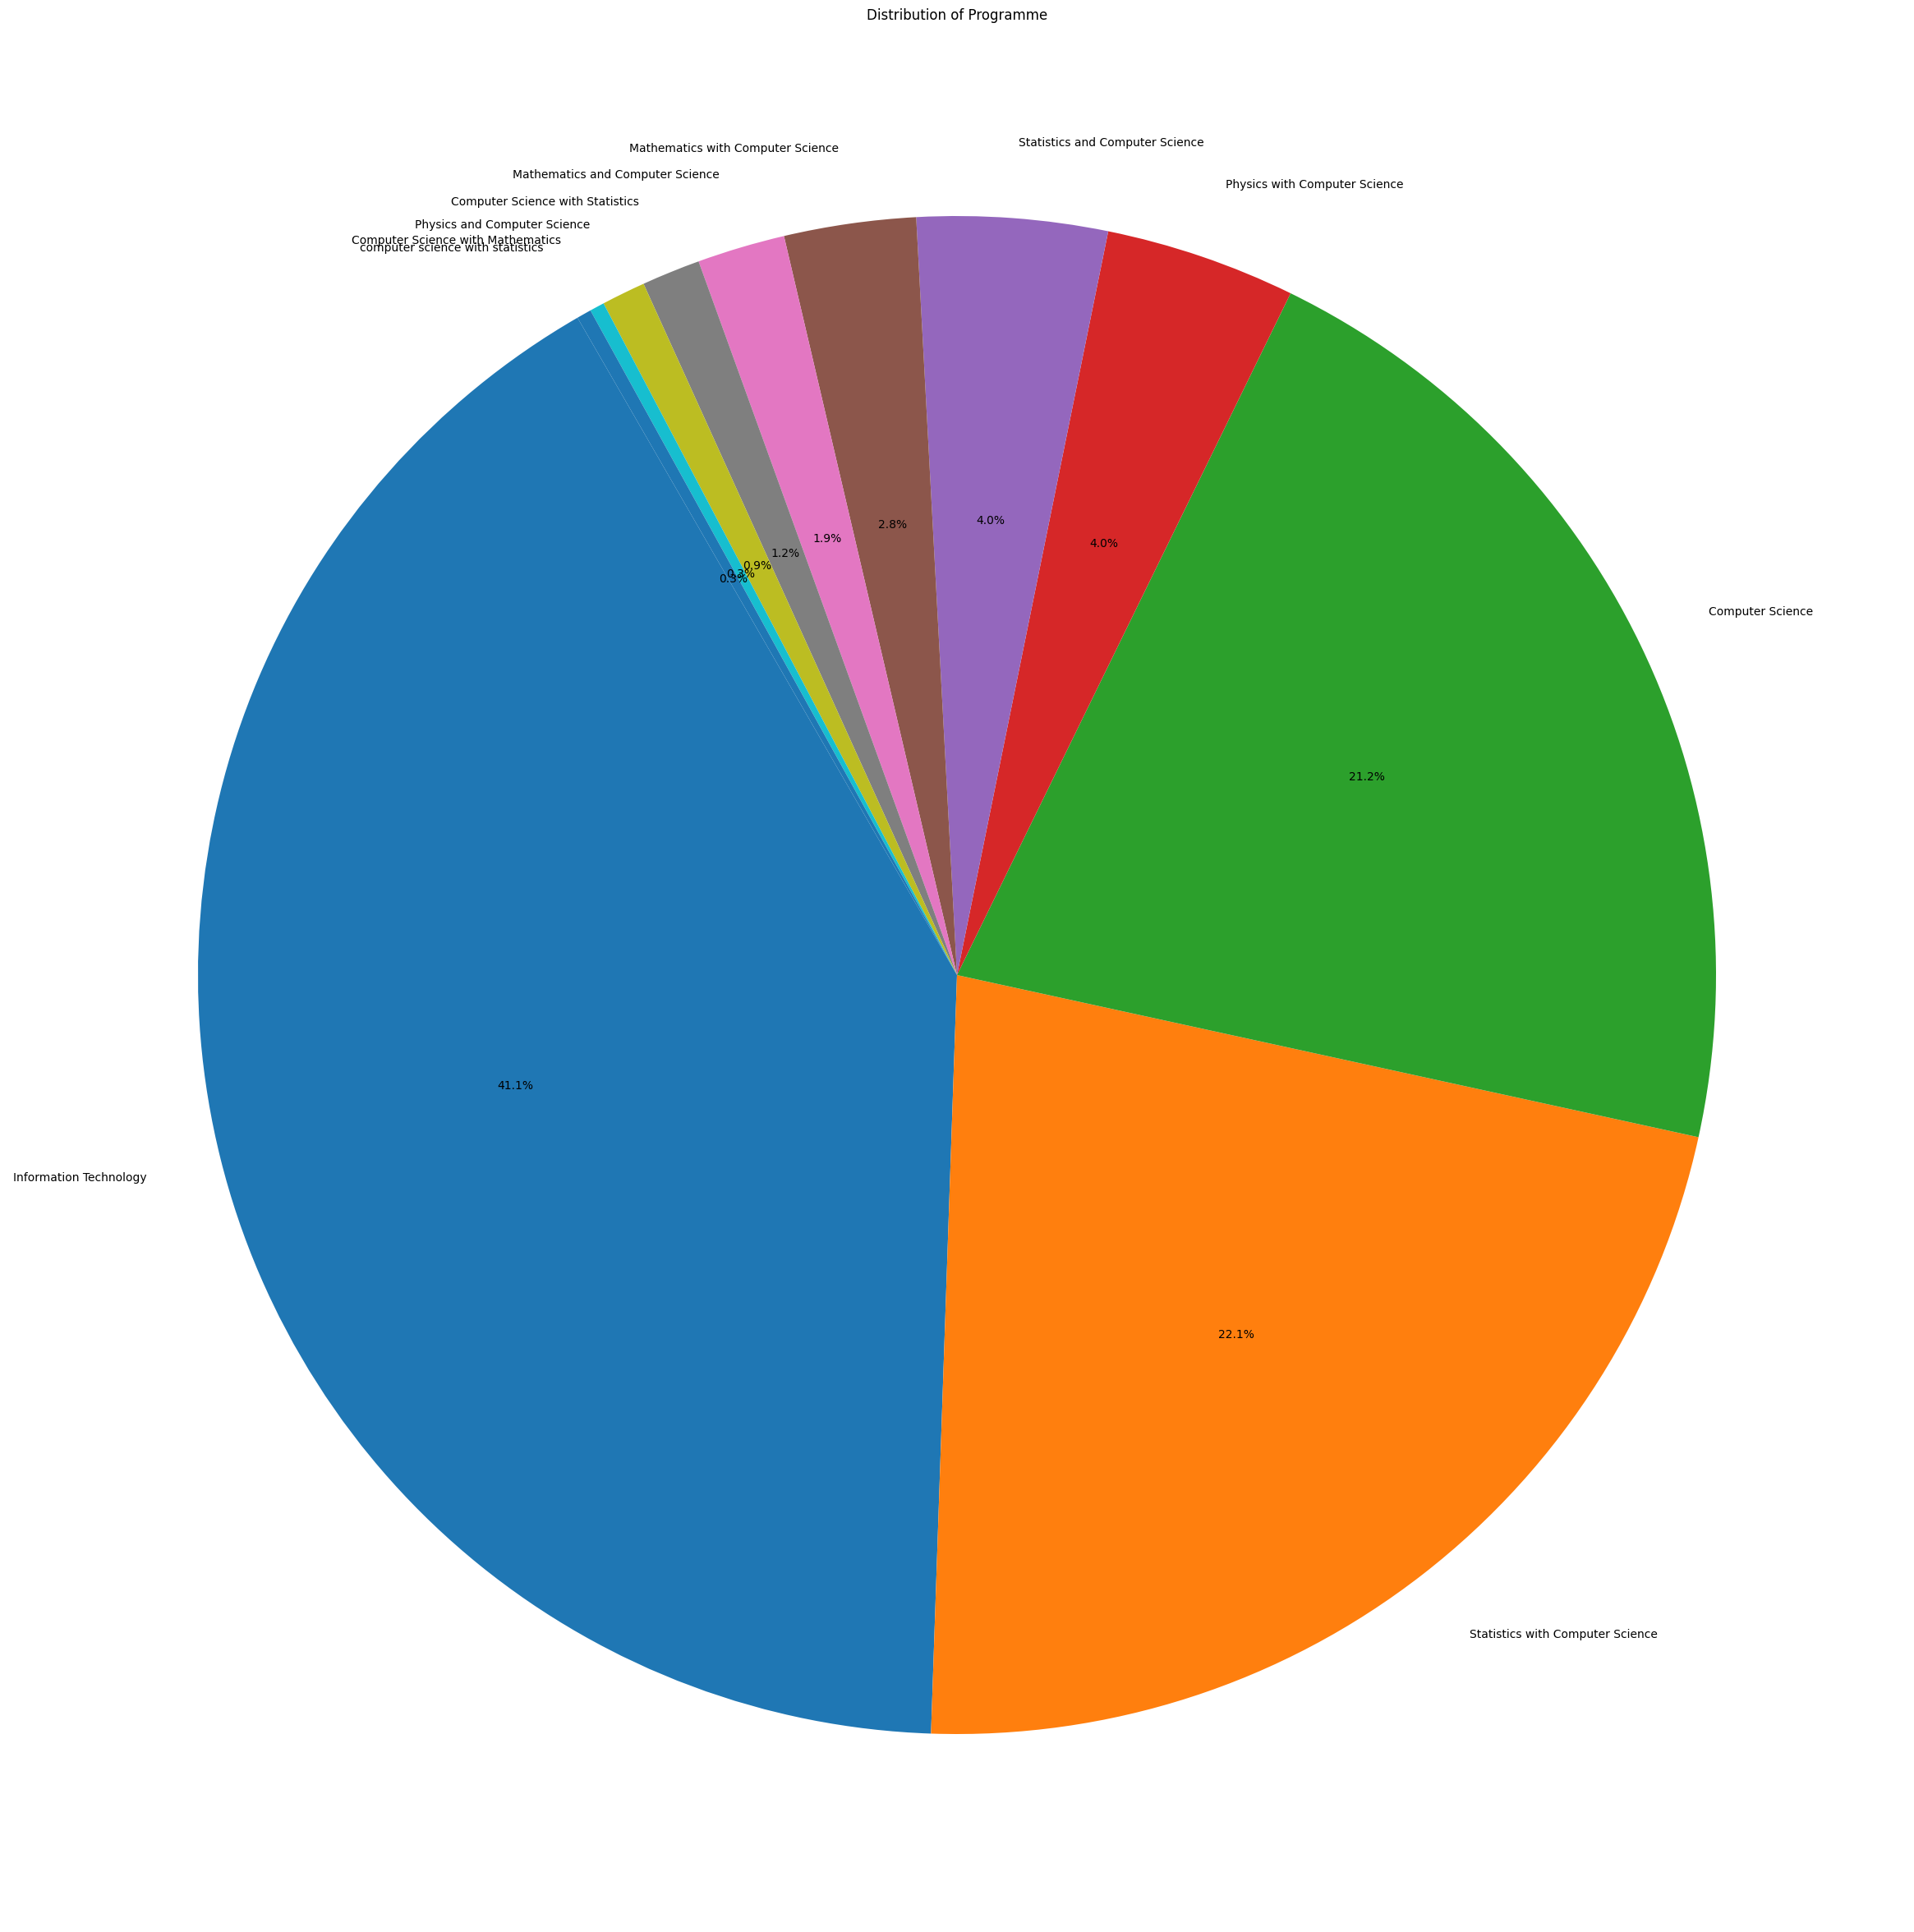

         Age  Gender Programme Type                          Programme  \
0    21 - 23    Male    Major Minor  Computer Science with Statistics    
1    18 - 20  Female    Major Minor   Statistics with Computer Science   
2    24 - 27    Male   Single Major             Information Technology   
3    18 - 20  Female   Single Major             Information Technology   
4    21 - 23    Male   Single Major             Information Technology   
..       ...     ...            ...                                ...   
316  21 - 23  Female   Single Major             Information Technology   
317  21 - 23    Male   Single Major             Information Technology   
318  18 - 20  Female    Major Minor   Mathematics and Computer Science   
319  18 - 20    Male    Major Minor   Statistics with Computer Science   
320  21 - 23    Male   Single Major             Information Technology   

            CGPA         Group  
0    2.00 - 2.99       Control  
1    2.00 - 2.99  Experimental  
2    2.00 - 

In [26]:
# Function to plot a pie chart for a given column in a dataframe
def plot_pie_chart(df, column):
    plt.figure(figsize=(30, 30))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=120)
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()


Students_with_Groups = pd.read_excel('Students_with_Groups.xlsx')

# Check if 'Programme' column exists in the dataframe
if 'Programme' in Students_with_Groups.columns:
    plot_pie_chart(Students_with_Groups, 'Programme')
else:
    print("Column 'Programme' not found in the dataframe.")

# Check the column names in the dataframe
print(Students_with_Groups)


In [1]:
# Documentation and Reporting (pseudo-code, actual implementation would involve writing to a report)
report = """
Methodology:
1. Stratification Ratios were calculated based on Programme.
2. Stratified sampling was performed using other features.
3. Random assignment to Control and Experimental groups ensured representativeness.
4. Addressed small sample sizes using oversampling.
5. Processed and handled clashes efficiently.
6. Reintegrated Main Class Clashes maintaining group balance.
7. Generated a new dataset with group assignments.
8. Created detailed visualizations comparing the groups.
9. Performed statistical tests ensuring no significant differences between groups.

Results:
- Visualizations show balanced distribution across groups.
- Chi-square tests confirm no significant differences in categorical features between groups.
"""

print(report)


Methodology:
1. Stratification Ratios were calculated based on Programme.
2. Stratified sampling was performed using other features.
3. Random assignment to Control and Experimental groups ensured representativeness.
4. Addressed small sample sizes using oversampling.
5. Processed and handled clashes efficiently.
6. Reintegrated Main Class Clashes maintaining group balance.
7. Generated a new dataset with group assignments.
8. Created detailed visualizations comparing the groups.
9. Performed statistical tests ensuring no significant differences between groups.

Results:
- Visualizations show balanced distribution across groups.
- Chi-square tests confirm no significant differences in categorical features between groups.

